<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_0_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.137708,26.485122,78.832640,0.489871,184.945341,184.320269,0.625072
1,0.0,1.0,38.899064,87.519010,92.428646,0.143323,228.990043,228.719005,0.271038
2,0.0,2.0,71.898363,35.237110,87.955612,0.686693,205.777778,204.996608,0.781170
3,0.0,3.0,21.170754,68.011510,78.631041,-0.651855,177.161450,177.530012,-0.368562
4,0.0,4.0,73.936028,73.521153,36.654996,0.630182,194.742359,194.140350,0.602009
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,92.299263,77.651369,28.694183,-0.122516,208.522299,208.484120,0.038179
19996,999.0,16.0,68.479449,56.577785,43.210667,-0.081600,178.186301,178.078654,0.107647
19997,999.0,17.0,95.433643,39.314322,67.776419,-0.360751,212.163633,212.123840,0.039794
19998,999.0,18.0,80.053327,71.354347,97.596260,0.367564,259.371497,258.826196,0.545302


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.137708,26.485122,78.832640,0.489871,184.945341,184.320269,0.625072
1,0.0,1.0,38.899064,87.519010,92.428646,0.143323,228.990043,228.719005,0.271038
2,0.0,2.0,71.898363,35.237110,87.955612,0.686693,205.777778,204.996608,0.781170
3,0.0,3.0,21.170754,68.011510,78.631041,-0.651855,177.161450,177.530012,-0.368562
4,0.0,4.0,73.936028,73.521153,36.654996,0.630182,194.742359,194.140350,0.602009
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,92.299263,77.651369,28.694183,-0.122516,208.522299,208.484120,0.038179
19996,999.0,16.0,68.479449,56.577785,43.210667,-0.081600,178.186301,178.078654,0.107647
19997,999.0,17.0,95.433643,39.314322,67.776419,-0.360751,212.163633,212.123840,0.039794
19998,999.0,18.0,80.053327,71.354347,97.596260,0.367564,259.371497,258.826196,0.545302


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    69.137708  26.485122  78.832640  ...  184.945341  184.320269  0.625072
      1.0    38.899064  87.519010  92.428646  ...  228.990043  228.719005  0.271038
      2.0    71.898363  35.237110  87.955612  ...  205.777778  204.996608  0.781170
      3.0    21.170754  68.011510  78.631041  ...  177.161450  177.530012 -0.368562
      4.0    73.936028  73.521153  36.654996  ...  194.742359  194.140350  0.602009
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   92.299263  77.651369  28.694183  ...  208.522299  208.484120  0.038179
      16.0   68.479449  56.577785  43.210667  ...  178.186301  178.078654  0.107647
      17.0   95.433643  39.314322  67.776419  ...  212.163633  212.123840  0.039794
      18.0   80.053327  71.354347  97.596260  ...  259.371497  258.826196  0.545302
      19.0   26.125557  60.559947  51.369731  ...  148.002288  148.050359 -0.048072

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    69.137708  26.485122  78.832640  ...  184.945341  184.320269  0.625072
      1.0    38.899064  87.519010  92.428646  ...  228.990043  228.719005  0.271038
      2.0    71.898363  35.237110  87.955612  ...  205.777778  204.996608  0.781170
      3.0    21.170754  68.011510  78.631041  ...  177.161450  177.530012 -0.368562
      4.0    73.936028  73.521153  36.654996  ...  194.742359  194.140350  0.602009
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   92.299263  77.651369  28.694183  ...  208.522299  208.484120  0.038179
      16.0   68.479449  56.577785  43.210667  ...  178.186301  178.078654  0.107647
      17.0   95.433643  39.314322  67.776419  ...  212.163633  212.123840  0.039794
      18.0   80.053327  71.354347  97.596260  ...  259.371497  258.826196  0.545302
      19.0   26.125557  60.559947  51.369731  ...  148.002288  148.050359 -0.048072

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.137708,26.485122,78.832640,0.489871,184.945341,184.320269,0.625072
1,0.0,1.0,38.899064,87.519010,92.428646,0.143323,228.990043,228.719005,0.271038
2,0.0,2.0,71.898363,35.237110,87.955612,0.686693,205.777778,204.996608,0.781170
3,0.0,3.0,21.170754,68.011510,78.631041,-0.651855,177.161450,177.530012,-0.368562
4,0.0,4.0,73.936028,73.521153,36.654996,0.630182,194.742359,194.140350,0.602009
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,92.299263,77.651369,28.694183,-0.122516,208.522299,208.484120,0.038179
19996,999.0,16.0,68.479449,56.577785,43.210667,-0.081600,178.186301,178.078654,0.107647
19997,999.0,17.0,95.433643,39.314322,67.776419,-0.360751,212.163633,212.123840,0.039794
19998,999.0,18.0,80.053327,71.354347,97.596260,0.367564,259.371497,258.826196,0.545302


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    69.137708  26.485122  78.832640  ...  184.945341  184.320269  0.625072
      1.0    38.899064  87.519010  92.428646  ...  228.990043  228.719005  0.271038
      2.0    71.898363  35.237110  87.955612  ...  205.777778  204.996608  0.781170
      3.0    21.170754  68.011510  78.631041  ...  177.161450  177.530012 -0.368562
      4.0    73.936028  73.521153  36.654996  ...  194.742359  194.140350  0.602009
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   92.299263  77.651369  28.694183  ...  208.522299  208.484120  0.038179
      16.0   68.479449  56.577785  43.210667  ...  178.186301  178.078654  0.107647
      17.0   95.433643  39.314322  67.776419  ...  212.163633  212.123840  0.039794
      18.0   80.053327  71.354347  97.596260  ...  259.371497  258.826196  0.545302
      19.0   26.125557  60.559947  51.369731  ...  148.002288  148.050359 -0.048072

[20000 rows x 7 columns]

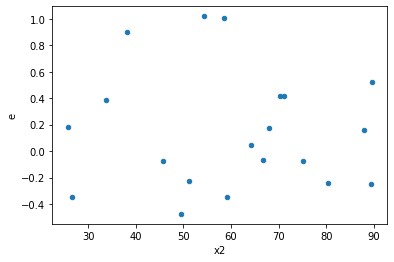

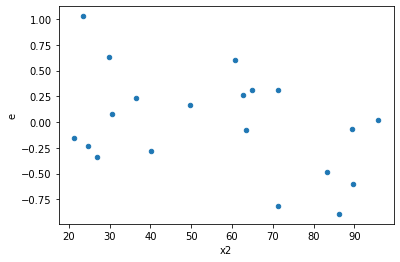

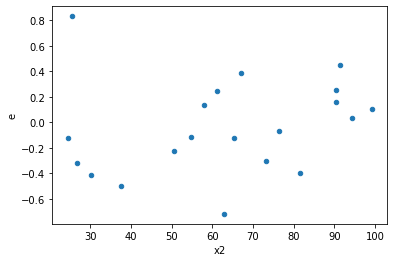

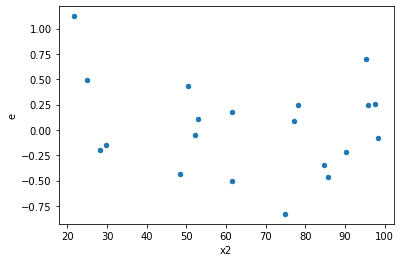

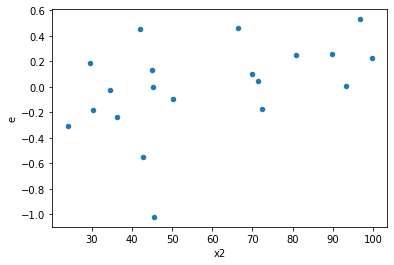

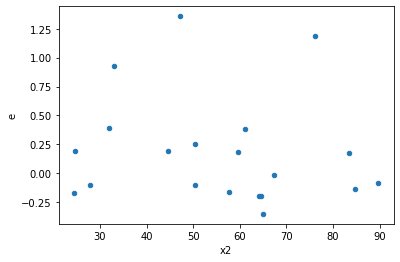

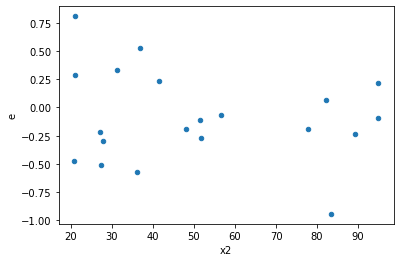

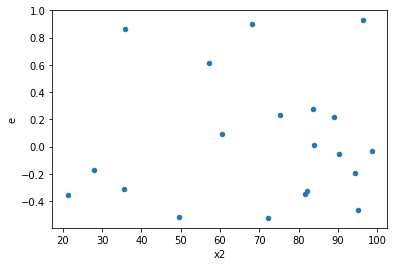

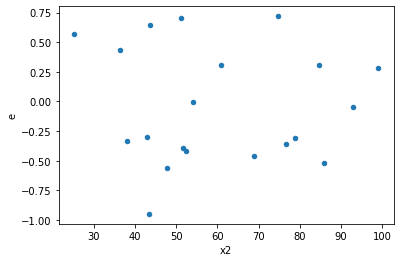

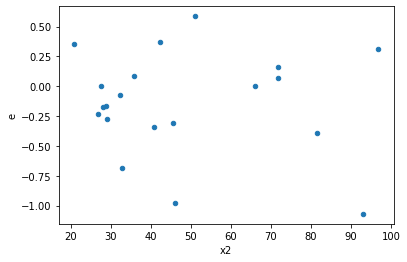

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,5.0,5.0,0.17106056643205267,0.6890394851613875,0.034212113286410537,0.1378078970322775,4.028043981925444,0.15244415189486316,0.9237779240525684,0.07622207594743158,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,0.3806396307612775,1.7850852483699522,0.0761279261522555,0.35701704967399045,4.689698875547431,0.11513628806507725,0.9424318559674614,0.057568144032538626,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,0.36685439370181405,0.4681993836229906,0.07337087874036281,0.09363987672459811,1.276253989760176,0.7954810235623013,0.6022594882188493,0.39774051178115066,Reject005=1 : Homoscedasticity
9.0,5.0,5.0,0.10567411123654448,0.28512581029432216,0.021134822247308897,0.05702516205886443,2.698161422489629,0.2999706130374826,0.8500146934812587,0.1499853065187413,Reject005=1 : Homoscedasticity
10.0,5.0,5.0,0.543394049390565,0.5769286677533377,0.108678809878113,0.11538573355066754,1.0617132602029464,0.9492069252997171,0.5253965373501415,0.47460346264985853,Reject005=1 : Homoscedasticity
19.0,5.0,5.0,0.14584709223276404,2.1726888636503245,0.029169418446552808,0.4345377727300649,14.897032435743258,0.010065192717114035,0.994967403641443,0.005032596358557018,Reject005=0 : Heteroscedasticity
21.0,5.0,5.0,0.28095601346137117,0.41899085695299376,0.056191202692274234,0.08379817139059875,1.4913041076823261,0.6716819544073285,0.6641590227963358,0.33584097720366424,Reject005=1 : Homoscedasticity
25.0,5.0,5.0,0.09550423403217247,1.5144989529985773,0.019100846806434493,0.30289979059971545,15.857924712410014,0.008726555198659058,0.9956367224006705,0.004363277599329529,Reject005=0 : Heteroscedasticity
28.0,5.0,5.0,0.9460662359892831,2.010370500275032,0.18921324719785662,0.40207410005500643,2.12497859430828,0.4276716730129586,0.7861641634935207,0.2138358365064793,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,1.6112446479658904,0.9224043894594265,0.3222489295931781,0.1844808778918853,0.5724794124988483,0.5553151362059651,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,0.612150975718977,0.23988455085186702,0.12243019514379541,0.04797691017037341,0.39187154863246015,0.3269911571943517,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,1.3392574364284526,0.8296589538162529,0.2678514872856905,0.16593179076325057,0.6194917655479271,0.612045337603363,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,0.368670932354056,0.2153061325485484,0.0737341864708112,0.043061226509709685,0.584006260471269,0.5693746561842993,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,2.1316943823816854,0.605293793174703,0.42633887647633706,0.1210587586349406,0.28394961218522535,0.19331343534615258,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,0.17106056643205267,0.6890394851613875,0.034212113286410537,0.1378078970322775,4.028043981925444,0.15244415189486316,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,0.3806396307612775,1.7850852483699522,0.0761279261522555,0.35701704967399045,4.689698875547431,0.11513628806507725,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,0.36685439370181405,0.4681993836229906,0.07337087874036281,0.09363987672459811,1.276253989760176,0.7954810235623013,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,1.4185289672336556,0.42852101852408775,0.28370579344673114,0.08570420370481754,0.3020883100891256,0.21493151847031763,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      907
Reject005=0 : Heteroscedasticity     93
Name: Result_test, dtype: int64